# Step 1: Import libraries and datasets

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Import all packages required for the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import dataset
Customer_information = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BUSANA 7002/Dataset.csv')
# View the first 5 rows of data to understand the general situation of the data
display(Customer_information.head())

,Customer,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,1455
1,2,social media,9.546326,0.167592,3388
2,3,email marketing,5.246263,0.043822,3562
3,4,referral,8.320327,0.123145,1147
4,5,paid advertising,30.450327,0.016341,1303


# Step 2: EDA

## Data Overview

In [19]:
# Check the overall condition of the dataset:
display(Customer_information.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer         5000 non-null   int64  
 1   channel          5000 non-null   object 
 2   cost             5000 non-null   float64
 3   conversion_rate  5000 non-null   float64
 4   revenue          5000 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 195.4+ KB


None

In [20]:
# Check the basic statistical characteristics of the dataset:
display(Customer_information.describe().T)

,count,mean,std,min,25%,50%,75%,max
Customer,5000.0,2500.500000,1443.520003,1.000000,1250.750000,2500.500000,3750.250000,5000.000000
cost,5000.0,13.207169,9.961837,5.246263,5.246263,8.320327,9.546326,30.450327
conversion_rate,5000.0,0.085930,0.059904,0.016341,0.043822,0.043822,0.123145,0.167592
revenue,5000.0,2777.821600,1254.982129,500.000000,1719.000000,2800.000000,3842.000000,4998.000000


In [21]:
# Check the types of each variable to classify them:
display(Customer_information.dtypes)

,0
Customer,int64
channel,object
cost,float64
conversion_rate,float64
revenue,int64


In [22]:
# Check for duplicate rows:
print(Customer_information.duplicated().sum())

# According to the output result, there are no duplicate rows.

0


## Missing value handling

In [23]:
# Check for missing values
print(Customer_information.isna().sum())

# Based on the output results, we found that there are no missing values in the dataset, so no further processing is required.

Customer           0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64


## Univariate analysis

### Histogram of Revenue and Cost

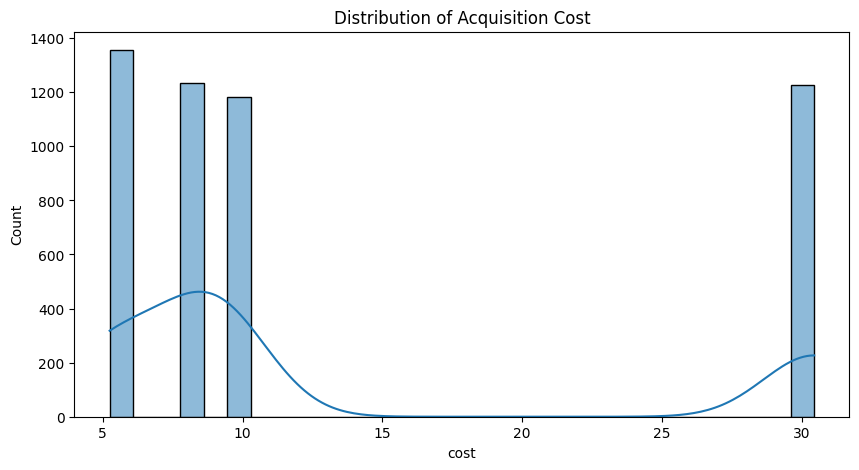

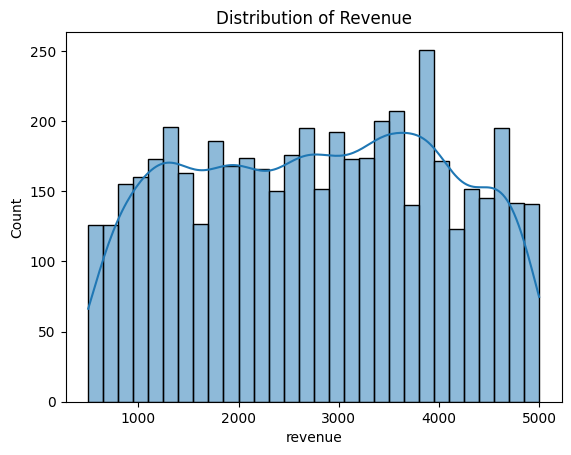

In [24]:
# Histogram of customer acquisition cost
plt.figure(figsize=(10,5))
sns.histplot(Customer_information['cost'], bins=30, kde=True)
plt.title("Distribution of Acquisition Cost")
plt.show()

# Histogram of actual revenue generated by customers
sns.histplot(Customer_information['revenue'], bins=30, kde=True)
plt.title("Distribution of Revenue")
plt.show()

### Distribution of customer acquisition channels

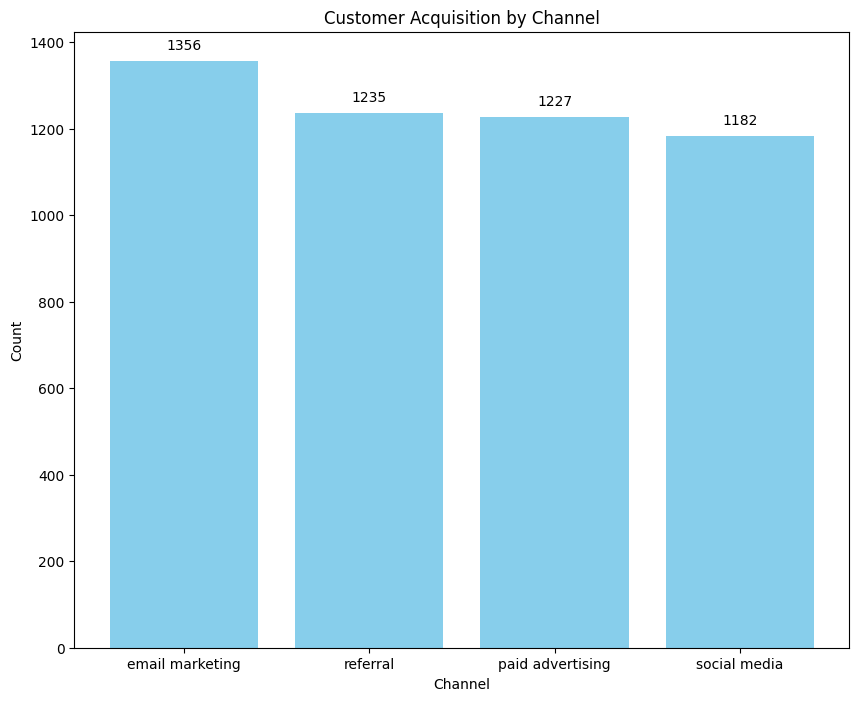

In [25]:
# Count the quantity of each channel
channel_counts = Customer_information['channel'].value_counts()

# Draw a bar chart
plt.figure(figsize=(10,8))
bars = plt.bar(channel_counts.index, channel_counts.values, color="skyblue")
plt.title("Customer Acquisition by Channel")
plt.xlabel("Channel")
plt.ylabel("Count")

# Add numbers on the pillar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20,
             str(int(height)),
             ha='center', va='bottom')

plt.show()


## Compare the differences among various channels

In [26]:
# Based on the table, group each channel and calculate the average customer acquisition cost, average conversion rate, and average revenue generated by customers for each channel.
channel_summary = Customer_information.groupby("channel").agg({
    "cost":"mean",
    "conversion_rate":"mean",
    "revenue":"mean"
}).reset_index()

display(channel_summary)

,channel,cost,conversion_rate,revenue
0,email marketing,5.246263,0.043822,2827.545723
1,paid advertising,30.450327,0.016341,2818.812551
2,referral,8.320327,0.123145,2776.714980
3,social media,9.546326,0.167592,2679.382403


# Step 3: Calculate ROI and CLTV

In [27]:
# Calculate ROI and CLTV
Customer_information['ROI'] = (Customer_information['revenue'] - Customer_information['cost']) / Customer_information['cost']
Customer_information['CLTV'] = (Customer_information['revenue'] - Customer_information['cost']) * (Customer_information['conversion_rate'] / Customer_information['cost'])
# Display the results of the top five customers
display(Customer_information.head())

,Customer,channel,cost,conversion_rate,revenue,ROI,CLTV
0,1,referral,8.320327,0.123145,1455,173.872940,21.411580
1,2,social media,9.546326,0.167592,3388,353.900945,59.311055
2,3,email marketing,5.246263,0.043822,3562,677.959445,29.709694
3,4,referral,8.320327,0.123145,1147,136.855163,16.853026
4,5,paid advertising,30.450327,0.016341,1303,41.791002,0.682927


# Step 4: Visualize ROI and CLTV

In [28]:
# Firstly, calculate the average ROI and average CLTV for each channel
roi_cltv_summary = Customer_information.groupby("channel")[["ROI","CLTV"]].mean().reset_index()
display(roi_cltv_summary)

,channel,ROI,CLTV
0,email marketing,537.963749,23.574771
1,paid advertising,91.570846,1.496404
2,referral,332.726676,40.973619
3,social media,279.671590,46.870790


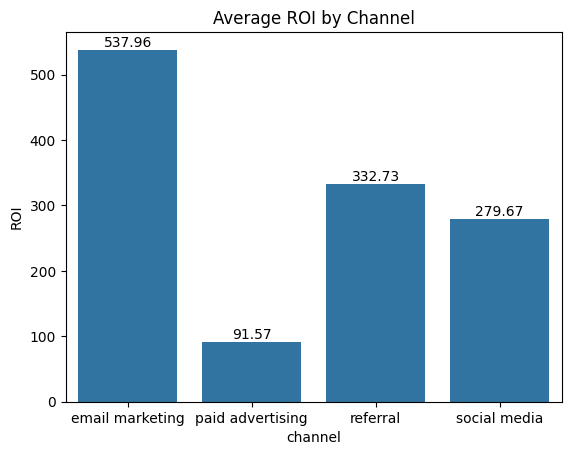

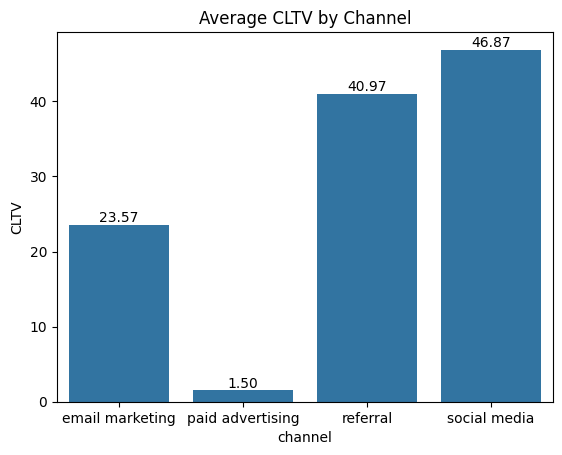

In [29]:
# ROI bar chart
ROI = sns.barplot(x="channel", y="ROI", data=roi_cltv_summary)
plt.title("Average ROI by Channel")
for container in ROI.containers:
    ROI.bar_label(container, fmt="%.2f")
plt.show()

# CLTV Bar Chart
CLTV = sns.barplot(x="channel", y="CLTV", data=roi_cltv_summary)
plt.title("Average CLTV by Channel")
for container in CLTV.containers:
    CLTV.bar_label(container, fmt="%.2f")
plt.show()

# Step 5: Discussion

1. ROI analysis:
* According to the ROI bar chart, we found that the average ROI of the four customer acquisition channels, from high to low, are as follows: email marketing (537.96), referral (332.73), social media (279.67), paid advertising (91.57).
* The ROI of all four channels is positive, indicating that all customer acquisition channels can bring revenue to the enterprise.
* The ROI of email marketing is the highest, indicating that this customer acquisition channel has the highest efficiency in terms of return on investment. In other words, the customer return obtained by the enterprise through email far exceeds the customer acquisition cost.
* On the contrary, paid advertising is the least efficient customer acquisition channel.

2. CLTV analysis:
* According to the CLTV bar chart results, we found that the average CLTV of the four customer acquisition channels, from high to low, are as follows: social media (46.87), referral (40.97), email marketing (23.57), paid advertising (1.50).
* Social media has the highest value in CLTV, indicating that customers obtained through social platforms have the greatest potential for long-term value and are the easiest to acquire high-value customers.
* On the contrary, paid advertising has the lowest CLTV and is the easiest to acquire low value customers who lack long-term value.

3. Strategic analysis:
* Email marketing has a high ROI as a customer acquisition channel, but a low CLTV, indicating that this channel can efficiently acquire profitable customers for the enterprise, but these customers lack long-term value. That is to say, email marketing, as a customer acquisition channel, is suitable for publishing promotions or seasonal activities to achieve short-term and rapid profit goals.
* Although social media and referral channels may not generate significant profits in the short term compared to Email marketing, they can effectively help maintain customer relationships, cultivate long-term customers, and bring long-term value. In practical situations, these two customer acquisition channels are suitable for publishing customized customer content and providing personalized marketing information to customers in a targeted manner.
* As both ROI and CLTV are the lowest, the usage proportion of paid advertising should be given special consideration. It is necessary for enterprises to consider whether to reduce or even cancel the implementation of this customer acquisition channel, and invest limited resources into the other three customer acquisition channels.